# I. Classification

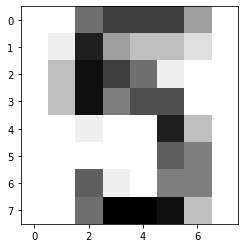

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
digits = datasets.load_digits()
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation = 'nearest')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42, stratify = y)

from sklearn.neighbors import KNeighborsClassifier

import numpy as np
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
print("Accuracy: {0}".format(knn.score(X_test, y_test)))

Accuracy: 0.9861111111111112


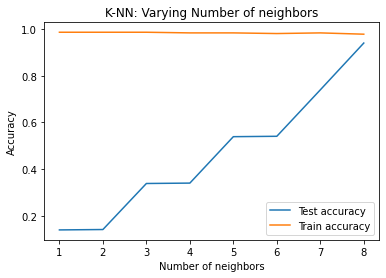

In [5]:
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    train_accuracy[i] = knn.score(X_test, y_test)
plt.title('K-NN: Varying Number of neighbors')
plt.plot(neighbors, test_accuracy, label = 'Test accuracy')
plt.plot(neighbors, train_accuracy, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision import datasets, transforms
mnist = datasets.MNIST(root='.',train=True, download=True)
print("num of train ex", mnist.train_data.shape)
print("image infro",mnist[0])

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(mnist[0][0])

# II. Linear Regression

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('gapminder.csv')
ax = sns.heatmap(df.corr(),square=True,cmap='RdY1Gn')
plt.show()

D:\Anaconda\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


ValueError: could not convert string to float: 'Middle East & North Africa'

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinerRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

x_fertility = df['fertility'].value.reshape(-1,1)
y_life = df['life'].values.reshape(-1,1)

prediction_space = np.linspace(min(x_fertility), max(x_fertility)).reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x_fertility,y_life,test_size=0.3,random_state=42)
reg = LinerRegression()
reg.fit(x_train,y_train)
y_predict = reg.predict(prediction_space)
print(reg.score(x_fertility, y_life))
plt.scatter(x_fertility, y_life, color='blue')
plt.plot(prediction_space, y_predict, color='black',newidth=3)
plt.ylabel('Life Expectancy')
plt.xlabel('Fertility')
plt.show()
                            

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

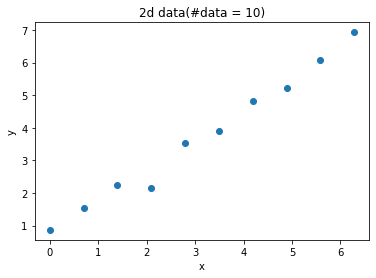

In [8]:
N = 10
m = .9
c=1
x=np.linspace(0,2*np.pi,N)
y=m*x + c + np.random.normal(0,.3,x.shape)
plt.figure()
plt.plot(x,y,'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2d data(#data = %d)' % N)
plt.show()

In [9]:
x_for_ploting = np.linspace(0,2*np.pi,1000)
design_matrix = torch.tensor(np.vstack([np.ones(x_for_plotting.shape),x_for_plotting]).T,dtype=

SyntaxError: unexpected EOF while parsing (<ipython-input-9-c2bc9c766260>, line 2)

# III. Recommendation Systems

In [12]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

ratings = pd.read_csv("https://s3-us-west-2.amazonaws.com/recommender-tutorial/ratings.csv")
ratings.head()

movies = pd.read_csv("https://s3-us-west-2.amazonaws.com/recommender-tutorial/movies.csv")
movies.head()

n_ratings = len(ratings)
n_movies = len(ratings['movieId'].unique())
n_users = len(ratings['userId'].unique())

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movieId's: {n_movies}")
print(f"Number of unique users: {n_users}")
print(f"Average ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average ratings per movie: {round(n_ratings/n_movies, 2)}")

user_freq = ratings[['userId', 'movieId']].groupby('userId').count().reset_index()
user_freq.columns = ['userId', 'n_ratings']
user_freq.head()


# Find Lowest and Highest rated movies:
mean_rating = ratings.groupby('movieId')[['rating']].mean()
# Lowest rated movies
lowest_rated = mean_rating['rating'].idxmin()
movies.loc[movies['movieId'] == lowest_rated]
# Highest rated movies
highest_rated = mean_rating['rating'].idxmax()
movies.loc[movies['movieId'] == highest_rated]
# show number of people who rated movies rated movie highest
ratings[ratings['movieId']==highest_rated]
# show number of people who rated movies rated movie lowest
ratings[ratings['movieId']==lowest_rated]

## the above movies has very low dataset. We will use bayesian average
movie_stats = ratings.groupby('movieId')[['rating']].agg(['count', 'mean'])
movie_stats.columns = movie_stats.columns.droplevel()

# Now, we create user-item matrix using scipy csr matrix
from scipy.sparse import csr_matrix

def create_matrix(df):

N = len(df['userId'].unique())
M = len(df['movieId'].unique())

user_mapper = dict(zip(np.unique(df["userId"]), list(range(N))))
movie_mapper = dict(zip(np.unique(df["movieId"]), list(range(M))))

# Map indices to IDs
user_inv_mapper = dict(zip(list(range(N)), np.unique(df["userId"])))
movie_inv_mapper = dict(zip(list(range(M)), np.unique(df["movieId"])))

user_index = [user_mapper[i] for i in df['userId']]
movie_index = [movie_mapper[i] for i in df['movieId']]

X = csr_matrix((df["rating"], (movie_index, user_index)), shape=(M, N))

return X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper

X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper = create_matrix(ratings)

from sklearn.neighbors import NearestNeighbors
"""
Find similar movies using KNN
"""
def find_similar_movies(movie_id, X, k, metric='cosine', show_distance=False):

neighbour_ids = []

movie_ind = movie_mapper[movie_id]
movie_vec = X[movie_ind]
k+=1
kNN = NearestNeighbors(n_neighbors=k, algorithm="brute", metric=metric)
kNN.fit(X)
movie_vec = movie_vec.reshape(1,-1)
neighbour = kNN.kneighbors(movie_vec, return_distance=show_distance)
for i in range(0,k):
n = neighbour.item(i)
neighbour_ids.append(movie_inv_mapper[n])
neighbour_ids.pop(0)
return neighbour_ids

movie_titles = dict(zip(movies['movieId'], movies['title']))

movie_id = 3

similar_ids = find_similar_movies(movie_id, X, k=10)
movie_title = movie_titles[movie_id]

print(f"Since you watched {movie_title}")
for i in similar_ids:
print(movie_titles[i])



IndentationError: expected an indented block (<ipython-input-12-0056629792d3>, line 53)